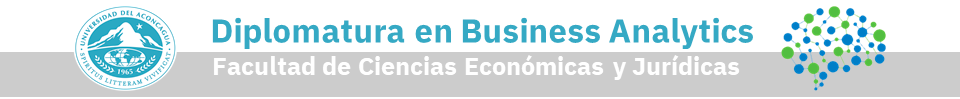

# ***MASTERCLASS NLP***

# ***_En este colab se trata de extraer noticias de algun tipo de sitios de news y buscar palabras, formar datasets e investigar a traves del tratamiento de lenguaje natural***

# ***-Como puedo extraer datos de un sitio: a traves de las API***
-###-API significa “interfaz de programación de aplicaciones”. En el contexto de las API, la palabra aplicación se refiere a cualquier software con una función distinta. La interfaz puede considerarse como un contrato de servicio entre dos aplicaciones

-API DE X = https://developer.x.com/en/docs


-API DE FACEBOOK E INSTAGRAM: https://developers.facebook.com/products/instagram/apis/


-### SITIO CON APIS: https://apilayer.com/


###-API de Twitter: (https://developer.twitter.com/)
### O utilizar la librería tweepy que nos facilitamo mucho la labor a la hora de obtener datos de Twitter:https://www.tweepy.org/


# ***Por lo tanto, para el análisis de datos, se debería tener respuesta a los siguientes interrogantes:***
###●	¿Se puede utilizar un conjunto de datos determinado para análisis?
###●	¿Los datos tienen el formato requerido?
###●	¿Los datos están alcanzados por algún tipo de licencia?
###●	¿Los datos están sujetos a las normas de protección de datos?
###●	¿Los datos presentan algún tipo de sesgo?
###●	¿Cuáles son las fuentes de datos?
###●	¿Las fuentes de datos son confiables?
###●	¿Cómo se recopilan los datos?


# ***Carga de librerias necesarias para el proceso***

-En este caso existe una biblioteca de python especifica para el acceso a GoogleNews

###-Bibliotecas de Python de ejemplo:
###-yahoofinance:https://pypi.org/project/yfinance installation
##-facebook: https://pypi.org/project/python-facebook-api/
##-linkedin: https://pypi.org/project/python3-linkedin/





# ***_Cual es la diferencia entre usar un API y una biblioteca especifica de acceso?***

Se carga la biblioteca que se aplica el sitio de GoogleNews:
https://pypi.org/project/GoogleNews/


In [ ]:
!pip install GoogleNews

# ***sys— Parámetros y funciones específicos del sistema ***
Este módulo proporciona acceso a algunas variables utilizadas o mantenidas por el intérprete y a funciones que interactúan fuertemente con el intérprete. Siempre está disponible:
https://docs.python.org/3/library/sys.html


In [ ]:
 import sys

# ***##Se carga pandas profiling para la creacion de la Nube de palabras***

###Proceso EDA  a traves de pandas profiling:
El análisis exploratorio de datos (EDA por sus siglas en inglés) implica el uso de gráficos y visualizaciones para explorar y analizar un conjunto de datos. El objetivo es explorar, investigar y aprender, no confirmar hipótesis estadísticas.

https://pypi.org/project/pandas-profiling/


In [ ]:
 !pip install ydata-profiling

###pathlib— Rutas del sistema de archivos orientado a objetos


###Este módulo ofrece clases que representan rutas de sistemas de archivos con semántica apropiada para diferentes sistemas operativos:
https://docs.python.org/3/library/pathlib.html


##¿Qué son los widgets?
###Los widgets son objetos de Python llenos de acontecimientos que tienen una representación en el navegador, a menudo como un control como un control deslizante, un cuadro de texto:
https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html


In [ ]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

Bibliotecas de graficos:
https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
https://seaborn.pydata.org/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')###El módulo warnings suprime los mensajes repetidos de la misma fuente para reducir la molestia de ver la misma advertencia una y otra vez.

Inicializamos en GoogleNews

In [ ]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()
googlenews.clear()

In [ ]:
googlenews = GoogleNews(lang='en')
googlenews.get_news('Corruption')
googlenews.search('Corruption')

##1-Aqui se elije el idioma de las noticias-ingles-
##2-el tipo de noticias y la palabra de referencia sobre ##las noticias: Corrupcion   
##3-la instruccion de busqueda

Obtener mensajes me  devolverá la lista de títulos de noticias

In [ ]:
googlenews.get_texts()

['Corruption Law Allows Gifts to State and Local Officials, Supreme Court Rules',
 "Supreme Court overturns ex-mayor's bribery conviction, narrowing the scope of public corruption law",
 'The Supreme Court rules that state officials can engage in a little corruption, as a treat',
 'China expels ousted defense ministers in corruption crackdown on military',
 'In a first, China accuses 2 former defence ministers of corruption',
 'China’s Communist Party expels ex-defence ministers over corruption charges',
 "Bishop Strickland Issues Warning Over 'Deep Corruption' in Vatican",
 'Netanyahu’s lawyer tells court PM can only testify in corruption trial in March 2025',
 'Two employees leave Adidas after probe of China corruption claims',
 "Prime Minister's Lawyers Tell Court Netanyahu Can Only Testify in Corruption Trial in March 2025 - Israel News",
 'How Morena Turned Anti-Corruption Politics Into Class Politics',
 'After alleging corruption by Oakland officials, a congressional candidate ge

Obtener enlaces Devuelve la lista de enlaces de noticias

In [ ]:
googlenews.get_links()

['news.google.com/articles/CBMiVGh0dHBzOi8vd3d3Lm55dGltZXMuY29tLzIwMjQvMDYvMjYvdXMvcG9saXRpY3Mvc3VwcmVtZS1jb3VydC1jb3JydXB0aW9uLWJyaWJlcnkuaHRtbNIBAA?hl=en-US&gl=US&ceid=US%3Aen',
 'news.google.com/articles/CBMiY2h0dHBzOi8vYXBuZXdzLmNvbS9hcnRpY2xlL3N1cHJlbWUtY291cnQtcHVibGljLWNvcnJ1cHRpb24tYnJpYmVyeS04OTc3NGYxZTNjZDZmMWEzNTM3MThiN2NlM2ZmMThhMNIBAA?hl=en-US&gl=US&ceid=US%3Aen',
 'news.google.com/articles/CBMiT2h0dHBzOi8vd3d3LnZveC5jb20vc2NvdHVzLzM1NzE3MC9zdXByZW1lLWNvdXJ0LXNueWRlci11bml0ZWQtc3RhdGVzLWNvcnJ1cHRpb27SAQA?hl=en-US&gl=US&ceid=US%3Aen',
 'news.google.com/articles/CBMicGh0dHBzOi8vd3d3Lm5iY25ld3MuY29tL25ld3Mvd29ybGQvY2hpbmEtZXhwZWxzLWRlZmVuc2UtbWluaXN0ZXJzLWNvbW11bmlzdC1wYXJ0eS1jb3JydXB0aW9uLW1pbGl0YXJ5LXJjbmExNTkyMDTSAStodHRwczovL3d3dy5uYmNuZXdzLmNvbS9uZXdzL2FtcC9yY25hMTU5MjA0?hl=en-US&gl=US&ceid=US%3Aen',
 'news.google.com/articles/CBMiggFodHRwczovL3d3dy5zY21wLmNvbS9uZXdzL2NoaW5hL21pbGl0YXJ5L2FydGljbGUvMzI2ODMwMy9mb3JtZXItY2hpbmVzZS1kZWZlbmNlLW1pbmlzdGVyLWxpLXNoYW5nZnUtdW5kZX

Obtener resultados devolverá la lista, [{'Título': '...', 'Medios': '...', 'Fecha': '...', 'DateTime': '...', ' Desc ':' ... ',' enlace ':' ... ',' img ':' ... '}]

In [ ]:
googlenews.results()

[{'title': 'Corruption Law Allows Gifts to State and Local Officials, Supreme Court Rules',
  'desc': None,
  'date': '16 hours ago',
  'datetime': datetime.datetime(2024, 6, 26, 20, 56, 37, 441463),
  'link': 'news.google.com/articles/CBMiVGh0dHBzOi8vd3d3Lm55dGltZXMuY29tLzIwMjQvMDYvMjYvdXMvcG9saXRpY3Mvc3VwcmVtZS1jb3VydC1jb3JydXB0aW9uLWJyaWJlcnkuaHRtbNIBAA?hl=en-US&gl=US&ceid=US%3Aen',
  'img': 'news.google.com/api/attachments/CC8iJ0NnNUNWbXBqWms5d2RUUjFYMUZ3VFJDM0FSaVRBaWdCTWdNOUVCSQ=-w64-h64-p-df',
  'media': 'The New York Times',
  'site': None,
  'reporter': 'Adam Liptak & Abbie L. Vansickle'},
 {'title': "Supreme Court overturns ex-mayor's bribery conviction, narrowing the scope of public corruption law",
  'desc': None,
  'date': '21 hours ago',
  'datetime': datetime.datetime(2024, 6, 26, 15, 56, 37, 442680),
  'link': 'news.google.com/articles/CBMiY2h0dHBzOi8vYXBuZXdzLmNvbS9hcnRpY2xlL3N1cHJlbWUtY291cnQtcHVibGljLWNvcnJ1cHRpb24tYnJpYmVyeS04OTc3NGYxZTNjZDZmMWEzNTM3MThiN2NlM2ZmMThh

##Construccion del Dataframe con las noticias
###Como los datos estan ordenados por links en la busqueda
###a traves de las dos palabras claves se crean 2 ###dataFrames, "bribery", "overlap", luego se concatenan en ##un solo conjunto de datos,una columna de description_text ###y su link hacia el sitio GoogleNews

1-se crean tres  objetos donde se alojan las busquedas:
# ***result_0 = googlenews.page_at(1)***

# ***desc_1 = googlenews.get_texts()***
# ***link_1 = googlenews.get_links()***

2- Se asignan en un bucle for los resultados de la busqueda a los objetos:

# ***for i in list(range(2, 10)):***

    result = googlenews.page_at(i)
    desc = googlenews.get_texts()
    link = googlenews.get_links()

    desc_1 = desc_1 + desc
    link_1 = link_1 + link

3- se construyen los dataframe con los resutados de la busqueda:
import pandas as pd

column_names = ["description_text", 'link']
df = pd.DataFrame(columns = column_names)

df['description_text'] = desc_1
df['link'] = link_1
display(df)

df.to_csv('google_news.csv', index = False)

df = df.reset_index()

bribery = df[df["description_text"].str.contains("bribery", na=False)]
overlap = df[df["description_text"].str.contains("overlap", na=False)]
robbery = df[df["description_text"].str.contains("robbery", na=False)]
bribery = pd.concat([bribery, overlap,robbery])
bribery['bribery'] = 'Yes'
bribery = bribery.reset_index(drop=True)

# -Se unen los dataFrame:

df = pd.merge(df,bribery,on='index',how='left')
df = df[['description_text_x','bribery']]

df.bribery = df.bribery.replace(np.NaN, 'No')
df

In [ ]:
result_0 = googlenews.page_at(1)

desc_1 = googlenews.get_texts()
link_1 = googlenews.get_links()

for i in list(range(2, 10)):

    result = googlenews.page_at(i)
    desc = googlenews.get_texts()
    link = googlenews.get_links()

    desc_1 = desc_1 + desc
    link_1 = link_1 + link

import pandas as pd

column_names = ["description_text", 'link']
df = pd.DataFrame(columns = column_names)

df['description_text'] = desc_1
df['link'] = link_1
display(df)

df.to_csv('google_news.csv', index = False)

df = df.reset_index()

bribery = df[df["description_text"].str.contains("bribery", na=False)]
overlap = df[df["description_text"].str.contains("overlap", na=False)]
robbery = df[df["description_text"].str.contains("robbery", na=False)]
bribery = pd.concat([bribery, overlap,robbery])
bribery['bribery'] = 'Yes'
bribery = bribery.reset_index(drop=True)

df = pd.merge(df,bribery,on='index',how='left')
df = df[['description_text_x','bribery']]

df.bribery = df.bribery.replace(np.NaN, 'No')
df

,description_text,link
0,Corruption Law Allows Gifts to State and Local...,news.google.com/articles/CBMiVGh0dHBzOi8vd3d3L...
1,Supreme Court overturns ex-mayor's bribery con...,news.google.com/articles/CBMiY2h0dHBzOi8vYXBuZ...
2,The Supreme Court rules that state officials c...,news.google.com/articles/CBMiT2h0dHBzOi8vd3d3L...
3,China expels ousted defense ministers in corru...,news.google.com/articles/CBMicGh0dHBzOi8vd3d3L...
4,"In a first, China accuses 2 former defence min...",news.google.com/articles/CBMiggFodHRwczovL3d3d...
...,...,...
1445,AL MPs blast corruption,https://www.newagebd.net/post/politics/238590/...
1446,Police face barrages of corruption allegations,https://www.newagebd.net/post/country/238585/p...
1447,Traffic Management Organization employees susp...,https://www.lbcgroup.tv/watch/chapter/70720/17...
1448,Vigilance Court Convicts Three RDA Officials o...,https://pragativadi.com/vigilance-court-convic...


,description_text_x,bribery
0,Corruption Law Allows Gifts to State and Local...,No
1,Supreme Court overturns ex-mayor's bribery con...,Yes
2,The Supreme Court rules that state officials c...,No
3,China expels ousted defense ministers in corru...,No
4,"In a first, China accuses 2 former defence min...",No
...,...,...
1445,AL MPs blast corruption,No
1446,Police face barrages of corruption allegations,No
1447,Traffic Management Organization employees susp...,No
1448,Vigilance Court Convicts Three RDA Officials o...,No


Determino tamaño del dataframe

In [ ]:
df.shape

(1450, 2)

# ***-Biblioteca adicional ...***

-Libreria skimpy: https://pypi.org/project/skimpy/
skimpy es una herramienta liviana que proporciona estadísticas resumidas sobre variables en marcos de datos pandas o polares dentro de la consola o su ventana interactiva de Python

In [ ]:
!pip install skimpy

In [ ]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1450   │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ description_text_x                 │      0 │         0 │                        11 │                16007 │  │
│ │ bribery                            │      0 │         0 │                         1 │                 1450 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

-Script sugerido para conjunto de datos numerico :
# ***from skimpy import skim, generate_test_data***

# ***df = generate_test_data()***
# ***skim(df)***

...........................................

## Para crear el dataFrame de Corruption, se buscan dos palabras clave para la construccion del dataframe producido a traves  la busqueda de noticias "bribery"-soborno-"overlap" -sobreprecio, en el sitio de googlenews

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   description_text_x  1450 non-null   object
 1   bribery             1450 non-null   object
dtypes: object(2)
memory usage: 22.8+ KB


Ahora generamos el análisis de datos exploratorios (EDA)  a traves de la utilizacion de pandas profiling

In [ ]:
# Generate the Profiling Report
profile = ProfileReport(
    df, title="Coruption", html={"style": {"full_width": True}}, sort=None
)

# ***Reporte EDA***

La utilidad de la descirpcion de las variables en la busqueda de palabras, la nube de palabras le da alguna pista u orientacion de busqueda.

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## El profile en version wiget horizontal

In [ ]:
# The Notebook Widgets Interface
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# ***-Establecemos dummies en el dataset de noticias***

In [ ]:
df

,description_text_x,bribery
0,Corruption Law Allows Gifts to State and Local...,No
1,Supreme Court overturns ex-mayor's bribery con...,Yes
2,The Supreme Court rules that state officials c...,No
3,China expels ousted defense ministers in corru...,No
4,"In a first, China accuses 2 former defence min...",No
...,...,...
1445,AL MPs blast corruption,No
1446,Police face barrages of corruption allegations,No
1447,Traffic Management Organization employees susp...,No
1448,Vigilance Court Convicts Three RDA Officials o...,No


***-Es logico  aplicar dummies en la columna principal -description_text_x en el dataFrame, que obtengo?***

In [ ]:
df = pd.get_dummies(df,columns=['description_text_x'], drop_first=True)### drop_first= True-elimina la primera de las columnas generadas, description_text_x.
display(df.head())
display(df.tail())

,bribery,description_text_x_'Bribery Has a Green Light' as Supreme Court Overturns Mayor's Conviction,description_text_x_2023 Corruption Perceptions Index: Explore the… - Transparency.org,description_text_x_AL MPs blast corruption,description_text_x_Adidas Ousts Two Employees in China Corruption Investigation,description_text_x_Adidas Probes Allegations of Corruption in China,"description_text_x_After alleging corruption by Oakland officials, a congressional candidate gets a tough question",description_text_x_Ajsu-P starts ‘Halla Bol’ protest against ‘corruption’ in govt,"description_text_x_Argentina's Milei promises to quash corruption, shocks with Supreme Court pick",description_text_x_Bishop Strickland Issues Warning Over 'Deep Corruption' in Vatican,...,"description_text_x_Vitals corruption case: Compilation of evidence against Fearne, Scicluna continues today",description_text_x_War on corruption: ACB books DySP in disproportionate assets case — The Kashmir Monitor,"description_text_x_Warhammer 40,000: Boltgun - Forges of Corruption Review - Gamereactor","description_text_x_Warhammer 40,000: Boltgun: Forges of Corruption, the new DLC is out now, with a free Horde Mode for all players","description_text_x_Waste, corruption, inefficiency, reform",description_text_x_What is the corruption in this? - Sammy Gyamfi defends NDC gurus listed in Dubai property scandal,"description_text_x_With closing arguments in Karen Read trial, jurors to decide: Deadly romance or police corruption?",description_text_x_Xi Jinping Signals More Military Purges in Call for Corruption Crackdown,description_text_x_Xi signals further military purges to eradicate corruption,description_text_x_‘Pro-corruption’: Hayes goes off on Supreme Court ruling $13k gift is not a bribe
0,No,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Yes,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,No,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,No,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,No,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,bribery,description_text_x_'Bribery Has a Green Light' as Supreme Court Overturns Mayor's Conviction,description_text_x_2023 Corruption Perceptions Index: Explore the… - Transparency.org,description_text_x_AL MPs blast corruption,description_text_x_Adidas Ousts Two Employees in China Corruption Investigation,description_text_x_Adidas Probes Allegations of Corruption in China,"description_text_x_After alleging corruption by Oakland officials, a congressional candidate gets a tough question",description_text_x_Ajsu-P starts ‘Halla Bol’ protest against ‘corruption’ in govt,"description_text_x_Argentina's Milei promises to quash corruption, shocks with Supreme Court pick",description_text_x_Bishop Strickland Issues Warning Over 'Deep Corruption' in Vatican,...,"description_text_x_Vitals corruption case: Compilation of evidence against Fearne, Scicluna continues today",description_text_x_War on corruption: ACB books DySP in disproportionate assets case — The Kashmir Monitor,"description_text_x_Warhammer 40,000: Boltgun - Forges of Corruption Review - Gamereactor","description_text_x_Warhammer 40,000: Boltgun: Forges of Corruption, the new DLC is out now, with a free Horde Mode for all players","description_text_x_Waste, corruption, inefficiency, reform",description_text_x_What is the corruption in this? - Sammy Gyamfi defends NDC gurus listed in Dubai property scandal,"description_text_x_With closing arguments in Karen Read trial, jurors to decide: Deadly romance or police corruption?",description_text_x_Xi Jinping Signals More Military Purges in Call for Corruption Crackdown,description_text_x_Xi signals further military purges to eradicate corruption,description_text_x_‘Pro-corruption’: Hayes goes off on Supreme Court ruling $13k gift is not a bribe
1445,No,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1446,No,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1447,No,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1448,No,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1449,No,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Columns: 149 entries, bribery to description_text_x_‘Pro-corruption’: Hayes goes off on Supreme Court ruling $13k gift is not a bribe
dtypes: bool(148), object(1)
memory usage: 221.0+ KB


# ***-Es logico el DataFrame que obtuve.??..es texto..tiene tratamiento diferente.***